In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('desafio_indicium_imdb.csv')

# Cleaning

In [3]:
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [4]:
# Verificando se há dados duplicados
df.duplicated().sum()

0

In [5]:
# Verificando a porcentagem de dados nulos
(df.isnull().sum()/len(df))*100

Unnamed: 0        0.000000
Series_Title      0.000000
Released_Year     0.000000
Certificate      10.110110
Runtime           0.000000
Genre             0.000000
IMDB_Rating       0.000000
Overview          0.000000
Meta_score       15.715716
Director          0.000000
Star1             0.000000
Star2             0.000000
Star3             0.000000
Star4             0.000000
No_of_Votes       0.000000
Gross            16.916917
dtype: float64

In [6]:
df[['Certificate', 'Meta_score', 'Gross']].isna().any(axis=1).sum()

286

In [7]:
# Excluindo os dados nulos

df = df.dropna(subset=['Certificate', 'Meta_score', 'Gross']).copy()
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 996
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     713 non-null    int64  
 1   Series_Title   713 non-null    object 
 2   Released_Year  713 non-null    object 
 3   Certificate    713 non-null    object 
 4   Runtime        713 non-null    object 
 5   Genre          713 non-null    object 
 6   IMDB_Rating    713 non-null    float64
 7   Overview       713 non-null    object 
 8   Meta_score     713 non-null    float64
 9   Director       713 non-null    object 
 10  Star1          713 non-null    object 
 11  Star2          713 non-null    object 
 12  Star3          713 non-null    object 
 13  Star4          713 non-null    object 
 14  No_of_Votes    713 non-null    int64  
 15  Gross          713 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 94.7+ KB


In [9]:
# Resetando o índice
df.reset_index(drop=True, inplace=True)

In [10]:
# Excluindo a coluna 'Unamed: 0'
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [11]:
# Verificando os valores únicos das colunas

for col in df.columns:
    print(f'Coluna: {col}')
    print(df[col].unique())
    print('-'*50)

Coluna: Series_Title
['The Godfather' 'The Dark Knight' 'The Godfather: Part II' '12 Angry Men'
 'The Lord of the Rings: The Return of the King' 'Pulp Fiction'
 "Schindler's List" 'Inception' 'Fight Club'
 'The Lord of the Rings: The Fellowship of the Ring' 'Forrest Gump'
 'Il buono, il brutto, il cattivo' 'The Lord of the Rings: The Two Towers'
 'The Matrix' 'Goodfellas'
 'Star Wars: Episode V - The Empire Strikes Back'
 "One Flew Over the Cuckoo's Nest" 'Gisaengchung' 'Interstellar'
 'Cidade de Deus' 'Sen to Chihiro no kamikakushi' 'Saving Private Ryan'
 'The Green Mile' 'La vita è bella' 'Se7en' 'The Silence of the Lambs'
 'Star Wars' 'Shichinin no samurai' 'Joker' 'Whiplash' 'The Intouchables'
 'The Prestige' 'The Departed' 'The Pianist' 'Gladiator'
 'American History X' 'The Usual Suspects' 'Léon' 'The Lion King'
 'Terminator 2: Judgment Day' 'Nuovo Cinema Paradiso' 'Back to the Future'
 'Once Upon a Time in the West' 'Psycho' 'Casablanca' 'Modern Times'
 'City Lights' 'Capharnaüm

In [12]:
# Procurando o valor 'PG' na coluna 'Released_Year'
df.query('Released_Year == "PG"')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
685,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [13]:
# Substituindo o valor de PG
df.loc[685,'Released_Year'] = '1995'

In [14]:
# Retirando 'min' da coluna 'Runtime'
df['Runtime'] = df.Runtime.str.rstrip(' min')

# Substituindo as vírgulas na coluna 'Gross'
df['Gross'] = df.Gross.str.replace(',','')

In [15]:
# Mudando os tipos de dados
df['Released_Year'] = df.Released_Year.astype('int64')
df['Runtime'] = df['Runtime'].astype('int64')
df['Gross'] = df.Gross.astype('int64')

# EDA

In [16]:
# color pallete
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [17]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,713.000000,713.000000,713.000000,713.000000,7.130000e+02,7.130000e+02
mean,1995.737728,123.690042,7.935203,77.154278,3.533480e+05,7.858395e+07
std,18.598129,25.896632,0.288999,12.409392,3.462212e+05,1.150433e+08
min,1930.000000,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,1987.000000,104.000000,7.700000,70.000000,9.582600e+04,6.153939e+06
50%,2001.000000,120.000000,7.900000,78.000000,2.363110e+05,3.500000e+07
75%,2010.000000,136.000000,8.100000,86.000000,5.059180e+05,1.025158e+08
max,2019.000000,238.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


In [18]:
df.describe(include='O')

,Series_Title,Certificate,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,713,713,713,713,713,713,713,713,713
unique,713,12,172,713,402,471,598,625,670
top,The Godfather,U,Drama,An organized crime dynasty's aging patriarch t...,Steven Spielberg,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,1,183,57,1,13,12,7,5,4


In [19]:
top_votes = df[df.No_of_Votes == df.No_of_Votes.max()]
top_gross = df[df.Gross == df.Gross.max()]
top_rating = df[df.IMDB_Rating == df.IMDB_Rating.max()]
top_metaScore = df[df.Meta_score == df.Meta_score.max()]

In [20]:
directors = df.Director.value_counts().reset_index(name='total').head(20)
directors 

,Director,total
0,Steven Spielberg,13
1,Martin Scorsese,10
2,Alfred Hitchcock,9
3,David Fincher,8
4,Clint Eastwood,8
5,Quentin Tarantino,8
6,Christopher Nolan,8
7,Woody Allen,7
8,Rob Reiner,7
9,Hayao Miyazaki,7


In [21]:
fig = px.histogram(df, x='Released_Year', histnorm='probability density', nbins=50, color_discrete_sequence=[AZUL1])
#fig = px.histogram(df, x='Released_Year', histfunc='sum', nbins=30, text_auto=True, color_discrete_sequence=[AZUL1])
#fig.update_traces(selector=dict(type='histogram'))

fig.update_layout(width=1300, height=600, font_size=15, font_color=CINZA2, title_font_color=CINZA1, title_font_size=24, 
                  title_text='Distribuição da quantidade de filmes ao longo dos anos',
                  xaxis_title='', yaxis_title='', plot_bgcolor='white')

fig.update_traces( hovertemplate = '<b>Anos:</b> %{x} <br> <b>Distribuição de probabilidade:</b> %{y}')


fig.show()

Podemos observar pelo gráfico um aumento gradativo na produção de filmes no decorrer dos anos, com um pico máximo no ano de 2014.

In [22]:
# Existe algum padrão na duração dos filmes ao longo dos anos?
runtime = df.groupby('Released_Year').Runtime.mean().reset_index(name='duration')
runtime

,Released_Year,duration
0,1930,152.000000
1,1931,87.000000
2,1933,100.000000
3,1934,105.000000
4,1936,87.000000
...,...,...
77,2015,125.944444
78,2016,118.550000
79,2017,118.444444
80,2018,125.000000


In [23]:
fig = px.line(runtime, x='Released_Year', y='duration', markers=True, color_discrete_sequence=[AZUL2], labels={'duration': 'Duração'})

fig.update_layout(width=1300, height=600, font_size=15, font_color=CINZA2, title_font_color=CINZA1, title_font_size=24, 
                  title_text='Duração dos filmes ao longo dos anos',
                  xaxis_title='', yaxis_title='', plot_bgcolor='white')

#labels = ['0h', '1h', '2h', '3h', '4h', '5h', '6h', '7h', '8h', '9h', '10h', '11h', '12h', '13h', '14h', '15h', '16h', '17h', '18h', '19h', '20h', '21h', '22h', '23h']
#fig.update_xaxes(ticktext=labels, tickvals=hours.index)

fig.update_traces(mode='markers+lines', hovertemplate = '<b>Ano:</b> %{x} <br> <b>Duração:</b> %{y} min')

fig.show()

Podemos observar que de 1930 a 1970 o tempo de duração dos filmes era muito aleatório e variava de um range de 87 min até 180 min. A partir de 1970 podemos observar uma dimunição do range de duração dos filmes, com uma média de 123 min de duração.

In [24]:
fig = px.histogram(df, x='IMDB_Rating', histnorm='probability density', nbins=30, color_discrete_sequence=[AZUL1])
#fig = px.histogram(df, x='Released_Year', histfunc='sum', nbins=30, text_auto=True, color_discrete_sequence=[AZUL1])
#fig.update_traces(selector=dict(type='histogram'))

fig.update_layout(width=1300, height=600, font_size=15, font_color=CINZA2, title_font_color=CINZA1, title_font_size=24, 
                  title_text='Distribuição das notas dos filmes',
                  xaxis_title='', yaxis_title='', plot_bgcolor='white')

fig.update_traces( hovertemplate = '<b>Rating:</b> %{x} <br> <b>Distribuição de probabilidade:</b> %{y}')


fig.show()

A maioria das notas dos filmes se concentram em 7.7 e muitos poucos conseguem notas acima de 9.
Neste dataset, os filmes que possuem ratings acima de 9 são apenas quatro: The Godfather (9.2), The Dark Knight (9.0), The Godfather: Part II (9.0) e 12 Andry Men (9.0), todos eles do gênero Crime e Drama.
Desses quatro filmes, The Dark Knight é o que possui o maior número de votos de todos os filmes, um total de 2.303.232 votos.

In [25]:
df.query('IMDB_Rating >= 9')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [26]:
df.sort_values(by='No_of_Votes', ascending=False).head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
7,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195
8,Fight Club,1999,A,139,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102
5,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762
10,Forrest Gump,1994,UA,142,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",82.0,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,330252182


In [27]:
# Existe algum padrão no número de votos ao longo dos anos?

votos = df.groupby('Released_Year').No_of_Votes.mean().reset_index(name='votos')
votos

,Released_Year,votos
0,1930,57318.000000
1,1931,167839.000000
2,1933,78991.000000
3,1934,94016.000000
4,1936,217881.000000
...,...,...
77,2015,382304.611111
78,2016,307471.800000
79,2017,307052.000000
80,2018,316447.916667


In [28]:
fig = px.line(votos, x='Released_Year', y='votos', markers=True, color_discrete_sequence=[AZUL2])

fig.update_layout(width=1300, height=600, font_size=15, font_color=CINZA2, title_font_color=CINZA1, title_font_size=24, 
                  title_text='Quantidade de votos de 1930 a 2019',
                  xaxis_title='', yaxis_title='', plot_bgcolor='white')


fig.update_traces(mode='markers+lines', hovertemplate = '<b>Ano:</b> %{x} <br> <b>Número de Votos:</b> %{y} ')

fig.show()

A partir de 1980 podemos observar um deslocamento para cima da referência mínima da quantidade de votos, que antes era em torno de 50.000, e agora em torno de 200.000 votos.

In [29]:
genres = df.set_index('Series_Title').Genre.str.split(', ', expand=True).stack().reset_index(level=1,drop=True)
df_gen = pd.DataFrame()
df_gen['genre'] = genres
df_gen

,genre
Series_Title,
The Godfather,Crime
The Godfather,Drama
The Dark Knight,Action
The Dark Knight,Crime
The Dark Knight,Drama
...,...
A Hard Day's Night,Music
A Hard Day's Night,Musical
From Here to Eternity,Drama


In [30]:
years = df.set_index('Series_Title').Released_Year
rating = df.set_index('Series_Title').IMDB_Rating
gross = df.set_index('Series_Title').Gross

temp = pd.merge(df_gen, years, left_index=True, right_index=True)
temp2 = pd.merge(temp, gross, left_index=True, right_index=True)
df_genre = pd.merge(temp2, rating, left_index=True, right_index=True)
df_genre

,genre,Released_Year,Gross,IMDB_Rating
Series_Title,,,,
The Godfather,Crime,1972,134966411,9.2
The Godfather,Drama,1972,134966411,9.2
The Dark Knight,Action,2008,534858444,9.0
The Dark Knight,Crime,2008,534858444,9.0
The Dark Knight,Drama,2008,534858444,9.0
...,...,...,...,...
A Hard Day's Night,Music,1964,13780024,7.6
A Hard Day's Night,Musical,1964,13780024,7.6
From Here to Eternity,Drama,1953,30500000,7.6


In [31]:
genre_count = df_genre.genre.value_counts().reset_index(name='total')
genre_count_norm = df_genre.genre.value_counts(normalize=True).reset_index(name='percent')


C:\Users\akemi\AppData\Local\Temp\ipykernel_4928\247842588.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




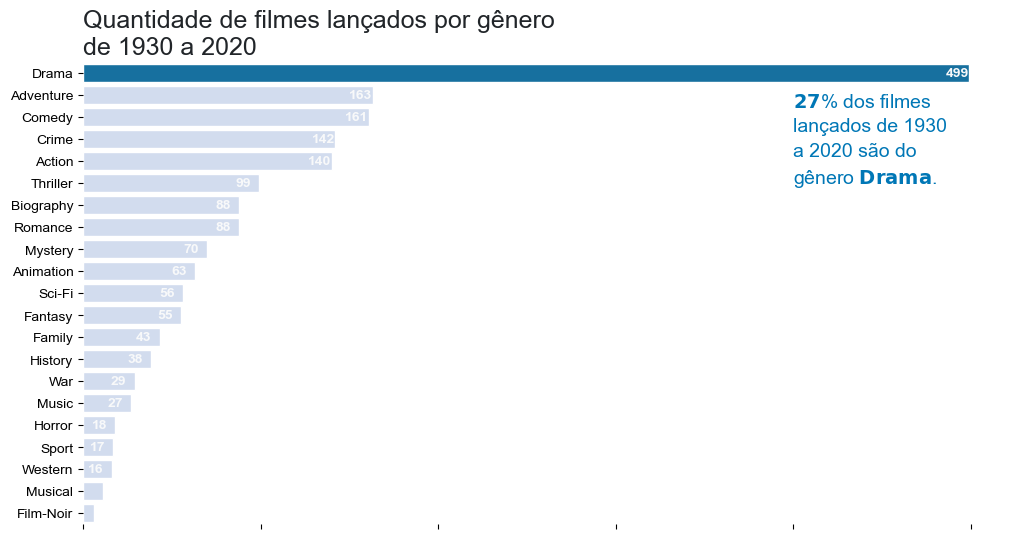

In [32]:

def plot_genre(colors: list=[AZUL2]):
    fig, ax = plt.subplots(figsize=(12,6))
    sns.set_theme(style='white')

    ax = sns.barplot(data=genre_count, y='genre', x='total', palette=colors)

    ax.set_title('Quantidade de filmes lançados por gênero\nde 1930 a 2020', loc='left', fontsize=18, color=CINZA1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
    sns.despine(left=True, bottom=True)

    ax.set_xticklabels([])
   
    for container in ax.containers:
        labels = [f'{valor.get_width():,.0f}' if valor.get_width() > 15 else '' for valor in container]
        ax.bar_label(container, padding=-17, labels=labels, size=10, color=CINZA5, fontweight='bold')

    
   
    return ax
    

colors = []
for i in genre_count.index:
    if genre_count.loc[i, 'total'] == genre_count.total.max():
        colors.append(AZUL2)
    else:
        colors.append(AZUL5)

ax = plot_genre(colors)

ax.text(400, 5,
        '$\\bf{27}$% dos filmes\n'
        'lançados de 1930 \n'
        'a 2020 são do \n'
        'gênero $\\bf{Drama}$.',
        fontsize=14, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()


In [33]:
genre_gross = df_genre.groupby('genre').Gross.mean().reset_index(name='total')
genre_gross = genre_gross.sort_values(by='total', ascending=False)

genre_gross

,genre,total
1,Adventure,1.718926e+08
16,Sci-Fi,1.611225e+08
0,Action,1.566213e+08
2,Animation,1.359713e+08
8,Fantasy,1.105749e+08
7,Family,1.034671e+08
4,Comedy,7.521764e+07
18,Thriller,6.494065e+07
10,History,6.218803e+07
3,Biography,5.984272e+07


C:\Users\akemi\AppData\Local\Temp\ipykernel_4928\2658745811.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




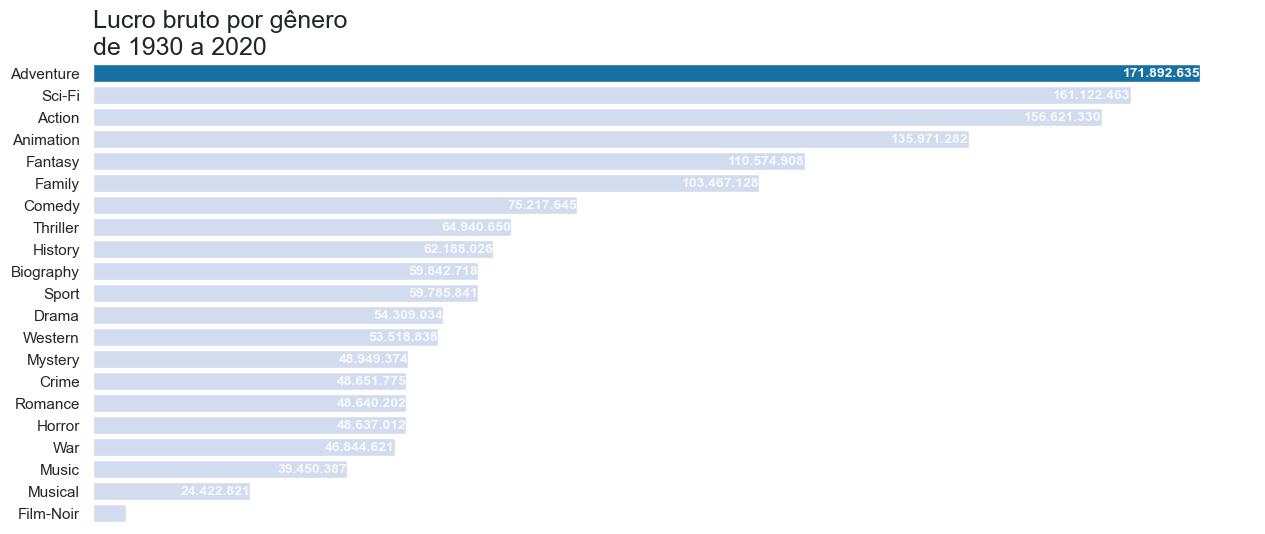

In [34]:
def plot_genre_gross(colors: list=[AZUL2]):
    fig, ax = plt.subplots(figsize=(15,6))
    sns.set_theme(style='white')

    ax = sns.barplot(data=genre_gross, y='genre', x='total', palette=colors)

    ax.set_title('Lucro bruto por gênero\nde 1930 a 2020', loc='left', fontsize=18, color=CINZA1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation=90)
    sns.despine(left=True, bottom=True)

    ax.set_xticklabels([])
   
    # for container in ax.containers:
    #     labels = [f'{valor.get_width():,.0f}' if valor.get_width() > 24000000 else '' for valor in container]
    #     ax.bar_label(container, padding=-60, labels=labels, size=10, color=CINZA5, fontweight='bold')
    
    for i, valor in enumerate(genre_gross.total):
        qtd = f'{valor:,.0f}'.replace(',','.')
        if valor < 24000000:
             qtd = ''
        offset = 1e3  # offset de 1.000
        ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

    
   
    return ax
    

colors = []
for i in genre_gross.index:
    if genre_gross.loc[i, 'total'] == genre_gross.total.max():
        colors.append(AZUL2)
    else:
        colors.append(AZUL5)

ax = plot_genre_gross(colors)

# ax.text(400, 5,
#         '$\\bf{27}$% dos filmes\n'
#         'lançados de 1930 \n'
#         'a 2020 são do \n'
#         'gênero $\\bf{Drama}$.',
#         fontsize=14, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()

In [35]:
certificate = df.Certificate.value_counts().reset_index(name='total')
certificate

,Certificate,total
0,U,183
1,A,173
2,UA,142
3,R,131
4,PG-13,38
5,PG,19
6,G,9
7,Passed,9
8,Approved,6
9,TV-PG,1


C:\Users\akemi\AppData\Local\Temp\ipykernel_4928\1856003374.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




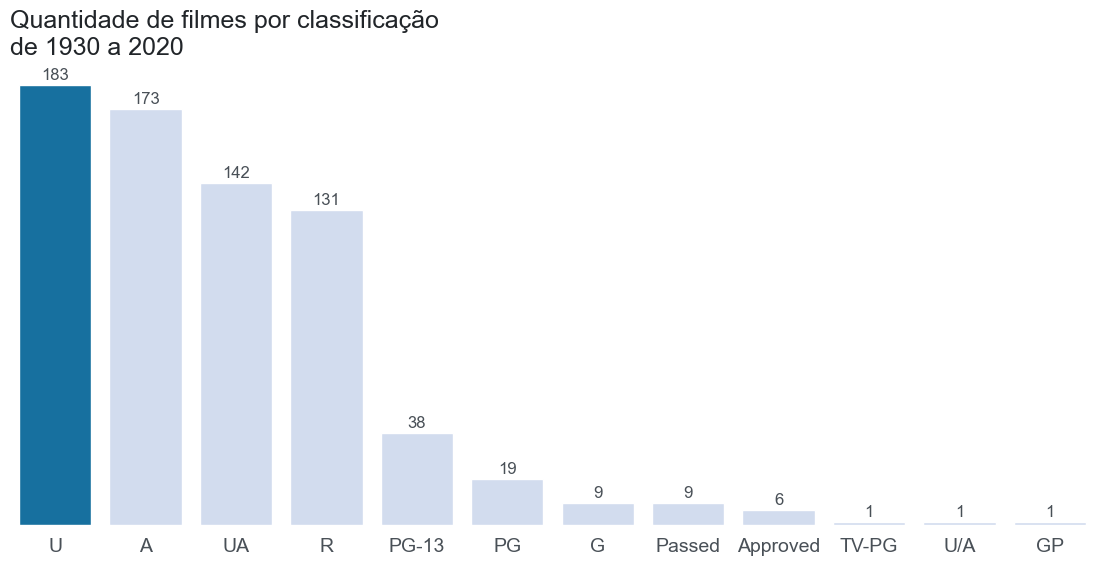

In [36]:
def plot_certificate(colors: list=[AZUL2]):
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_theme(style='white')

    ax = sns.barplot(data=certificate, x='Certificate', y='total', palette=colors)

    ax.set_title('Quantidade de filmes por classificação\nde 1930 a 2020', loc='left', fontsize=18, color=CINZA1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
    sns.despine(left=True, bottom=True)

    ax.set_yticklabels([])
    for i, valor in enumerate(certificate.total):
        qtd = f'{valor:,.0f}'
        offset = 4
        ax.text(i, valor+offset, qtd, color=CINZA2, fontsize=12, ha='center', va='center')
    return ax

colors = []
for i in certificate.index:
    if certificate.loc[i, 'total'] == certificate.total.max():
        colors.append(AZUL2)
    else:
        colors.append(AZUL5)

ax = plot_certificate(colors)


fig = ax.get_figure()

In [37]:
fig = px.scatter(df, x = 'Runtime', y = 'IMDB_Rating', trendline='ols', color = 'IMDB_Rating', color_continuous_scale = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5])

fig.update_layout(width=1300, height=600, font_size=15, font_color=CINZA2, title_font_color=CINZA1, title_font_size=24, 
                  title_text='Distribuição das notas pelo tempo de duração dos filmes',
                  xaxis_title='', yaxis_title='', plot_bgcolor='white')

fig.update_traces( hovertemplate = '<b>Duração:</b> %{x} min<br> <b>Rating:</b> %{y}')
fig.show()

In [38]:
fig = px.scatter(df, x = 'Runtime', y = 'No_of_Votes', trendline='ols', color = 'No_of_Votes', color_continuous_scale = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5])

fig.update_layout(width=1300, height=600, font_size=15, font_color=CINZA2, title_font_color=CINZA1, title_font_size=24, 
                  title_text='Distribuição da quantidade de votos pelo tempo de duração dos filmes',
                  xaxis_title='', yaxis_title='', plot_bgcolor='white')

fig.update_traces( hovertemplate = '<b>Duração:</b> %{x} min<br> <b>Número de votos:</b> %{y}')
fig.show()

In [39]:
fig = px.scatter(df, y = 'IMDB_Rating', x = 'No_of_Votes', trendline='ols', color = 'IMDB_Rating', color_continuous_scale = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5])

fig.update_layout(width=1300, height=600, font_size=15, font_color=CINZA2, title_font_color=CINZA1, title_font_size=24, 
                  title_text='Distribuição das notas pelo número de votos dos filmes',
                  xaxis_title='', yaxis_title='', plot_bgcolor='white')

fig.update_traces( hovertemplate = '<b>Número de votos:</b> %{x} <br> <b>Rating:</b> %{y}')
fig.show()

In [40]:
fig = px.scatter(df, y = 'IMDB_Rating', x = 'Gross', trendline='ols', color = 'IMDB_Rating', color_continuous_scale = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5])

fig.update_layout(width=1300, height=600, font_size=15, font_color=CINZA2, title_font_color=CINZA1, title_font_size=24, 
                  title_text='Distribuição das notas pelo lucro bruto dos filmes',
                  xaxis_title='', yaxis_title='', plot_bgcolor='white')

fig.update_traces( hovertemplate = '<b>Lucro bruto:</b> %{x} <br> <b>Rating:</b> %{y}')
fig.show()

# Model Building

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error

In [42]:
df_imdb = df.copy()

# Separando a coluna 'Genre'
df_imdb['Genre'] = df_imdb.Genre.str.split(', ')
df_imdb = df_imdb.explode('Genre')
df_imdb.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
0,The Godfather,1972,A,175,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
1,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
1,The Dark Knight,2008,UA,152,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
1,The Dark Knight,2008,UA,152,Drama,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444


In [43]:
# Retirando as colunas 'Series_Tile' e 'Overview'
df_imdb.drop(columns=['Series_Title', 'Overview'], axis=1, inplace=True)

In [44]:
# Agrupando as colunas com ratings médios e criando novos atributos

genre_mean_rating = df_imdb.groupby('Genre')['IMDB_Rating'].transform('mean')
df_imdb['genre_mean'] = genre_mean_rating

certificate_mean_rating = df_imdb.groupby('Certificate')['IMDB_Rating'].transform('mean')
df_imdb['certificate_mean'] = certificate_mean_rating

director_mean_rating = df_imdb.groupby('Director')['IMDB_Rating'].transform('mean')
df_imdb['director_mean'] = director_mean_rating

star1_mean_rating = df_imdb.groupby('Star1')['IMDB_Rating'].transform('mean')
df_imdb['star1_mean'] = star1_mean_rating

star2_mean_rating = df_imdb.groupby('Star2')['IMDB_Rating'].transform('mean')
df_imdb['star2_mean'] = star2_mean_rating

star3_mean_rating = df_imdb.groupby('Star3')['IMDB_Rating'].transform('mean')
df_imdb['star3_mean'] = star3_mean_rating

star4_mean_rating = df_imdb.groupby('Star4')['IMDB_Rating'].transform('mean')
df_imdb['star4_mean'] = star4_mean_rating

In [45]:
# Definindo X e y
y = df_imdb['IMDB_Rating']
X = df_imdb.drop(columns=['IMDB_Rating', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'star1_mean', 'star2_mean',  'star3_mean','star4_mean', 'genre_mean'])

In [46]:
# Aplicando o split de X e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 2)

In [47]:
# Construindo o modelo
lm=LinearRegression()
lm = lm.fit(X_train, y_train)

train_pred = lm.predict(X_train)
test_pred = lm.predict(X_test)

RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))

print('RMSE training data= ', str(RMSE_train))
print('RMSE test data= ', str(RMSE_test))
print('-'*50)
print('Rsquared value on train: ', lm.score(X_train, y_train))
print('Rsquared value on test: ', lm.score(X_test, y_test))

print('R2 score: ', r2_score(y_test, test_pred))

errors = abs(test_pred - y_test)

mape = 100*(errors/y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

RMSE training data=  0.15343378035118027
RMSE test data=  0.15130313541628626
--------------------------------------------------
Rsquared value on train:  0.7166493728501833
Rsquared value on test:  0.7008005056579619
R2 score:  0.7008005056579619
Accuracy: 98.61 %


In [48]:
novo_filme = {#'Series_Title': 'The Shawshank Redemption',
              'Released_Year': [1994],
              'Runtime': [142],
              'Meta_score': [80.0],
              'No_of_Votes': [2343110],
              'Gross': [28341469],
              #'genre_mean': [7.938677],
              'certificate_mean': [7.978886],
              'director_mean': [8.6],
              #'star1_mean': [8],
              #'star2_mean': [8.1],
              #'star3_mean': [8],
              #'star4_mean': [8]
              #'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
              }

trail = pd.DataFrame(novo_filme)


In [49]:
rating_predict = lm.predict(trail)
print('Predict Rating: ', rating_predict[0])

Predict Rating:  9.241006640609857


# Salvando o modelo

In [50]:
import pickle

nome_arquivo = 'LH_CD_suelenyoza.pkl'

with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(lm,arquivo)

SyntaxError: invalid syntax (4152152062.py, line 1)

SyntaxError: invalid syntax (245558611.py, line 1)